# Result access API demo

Han Hou 02/2025

In [1]:
%load_ext autoreload
%autoreload 2

import logging
logging.basicConfig(level=logging.INFO)

import pandas as pd

from aind_analysis_arch_result_access.han_pipeline import get_session_table, get_mle_model_fitting, get_logistic_regression

## 1. Get the master session table (same as in Streamlit, updated daily)

In [10]:
df_master = get_session_table(if_load_bpod=False)

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...


In [11]:
df_master.shape

(7609, 148)

In [12]:
df_master.head()

,subject_id,session_date,nwb_suffix,session,rig,trainer,PI,curriculum_name,curriculum_version,current_stage_actual,...,abs(bias_naive),abs(logistic_Su2022_bias),abs(logistic_Bari2019_bias),abs(logistic_Hattori2019_bias),abs(logistic_Miller2021_bias),weekday,avg_trial_length_in_seconds,water_day_total_last_session,water_after_session_last_session,curriculum_version_group
0,769253,2025-03-12,185318,32.0,446-8-D,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,GRADUATED,...,0.163972,0.244651,0.183107,0.180300,0.130287,3,10.344828,NaN,NaN,v3
1,765628,2025-03-12,185051,10.0,446-8-C,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.347932,0.249706,0.186309,0.190249,0.265820,3,10.563380,NaN,NaN,v3
2,765062,2025-03-12,184659,23.0,446-7-D,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,GRADUATED,...,0.039848,0.000998,0.003768,0.003553,0.012560,3,9.255898,NaN,NaN,v3
3,765626,2025-03-12,183921,10.0,446-7-C,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.193858,0.140964,0.136131,0.198543,0.162198,3,8.604207,NaN,NaN,v3
4,770772,2025-03-12,183710,32.0,446-7-A,Bowen Tan,Bowen Tan,Uncoupled Baiting,2.3,STAGE_FINAL,...,0.272727,0.210806,0.194899,0.196089,0.234781,3,9.285714,NaN,NaN,v3


In [13]:
print(df_master.columns)

Index(['subject_id', 'session_date', 'nwb_suffix', 'session', 'rig', 'trainer',
       'PI', 'curriculum_name', 'curriculum_version', 'current_stage_actual',
       ...
       'abs(bias_naive)', 'abs(logistic_Su2022_bias)',
       'abs(logistic_Bari2019_bias)', 'abs(logistic_Hattori2019_bias)',
       'abs(logistic_Miller2021_bias)', 'weekday',
       'avg_trial_length_in_seconds', 'water_day_total_last_session',
       'water_after_session_last_session', 'curriculum_version_group'],
      dtype='object', length=148)


## 2. Get logistic regression results

In [6]:
from aind_analysis_arch_result_access.han_pipeline import get_logistic_regression

Get one session

In [31]:
df_logistic = get_logistic_regression(
    df_sessions=pd.DataFrame(
        {
            "subject_id": ["769253"],
            "session_date": ["2025-03-12"],
        }
    ),
    model="Su2022",
    if_download_figures=False,
)
df_logistic

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...
Get logistic regression betas from s3: 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]
INFO:aind_analysis_arch_result_access.han_pipeline:Successfully retrieved logistic regression betas from 1 / 1 sessions.


subject_id session_date nwb_suffix      RewC                               \
                                            15        14        13       12   
0     769253   2025-03-12     185318  0.167723  0.012139 -0.002052 -0.25395   

                                 ...      UnrC                bias  \
         11        10         9  ...         2         1       NaN   
0  0.030127 -0.036445  0.077883  ...  0.295642  0.633673 -0.244651   

  logistic_Su2022_RewC_amp logistic_Su2022_RewC_tau logistic_Su2022_UnrC_amp  \
                       NaN                      NaN                      NaN   
0                 1.821531                    1.651                 1.230054   

  logistic_Su2022_UnrC_tau logistic_Su2022_bias logistic_Su2022_score_mean  \
                       NaN                  NaN                        NaN   
0                 1.512642            -0.244651                     0.8018   

  logistic_Su2022_score_std  
                        NaN  
0                  0.103951  

[1 rows x 41 columns]

Get beta coefficients

In [40]:
# Rewarded choice (of "N" trials back)
df_logistic.RewC

,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
0,0.167723,0.012139,-0.002052,-0.25395,0.030127,-0.036445,0.077883,0.018846,0.235873,0.001608,0.174253,0.037561,0.369203,0.475439,1.01776


In [44]:
df_logistic.bias

,NaN
0,-0.244651


Get sessions in batch

In [19]:
df_logistic = get_logistic_regression(
    df_master.query("subject_id == '769253'"),  # All sessions from a single subject
    model="Su2022",
    if_download_figures=True,
    download_path="./tmp",
)
df_logistic.head()

INFO:aind_analysis_arch_result_access.han_pipeline:Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...


INFO:aind_analysis_arch_result_access.han_pipeline:Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
INFO:aind_analysis_arch_result_access.han_pipeline:Post-hoc processing...
Get logistic regression betas from s3: 100%|██████████| 32/32 [00:00<00:00, 143.71it/s]
INFO:aind_analysis_arch_result_access.han_pipeline:Successfully retrieved logistic regression betas from 32 / 32 sessions.
Download logistic regression figures from s3 to ./tmp: 100%|██████████| 32/32 [00:00<00:00, 145.16it/s]


subject_id session_date nwb_suffix      RewC                                \
                                            15        14        13        12   
0     769253   2025-03-12     185318  0.167723  0.012139 -0.002052 -0.253950   
1     769253   2025-03-11     190030  0.025625  0.047670  0.161796 -0.086204   
2     769253   2025-03-10     184446  0.037325  0.247840 -0.154823 -0.118705   
3     769253   2025-03-09     165658  0.378673 -0.194260  0.316576  0.084161   
4     769253   2025-03-08     152809 -0.151415 -0.159483  0.037031  0.274597   

                                 ...      UnrC                bias  \
         11        10         9  ...         2         1       NaN   
0  0.030127 -0.036445  0.077883  ...  0.295642  0.633673 -0.244651   
1 -0.111452 -0.097525  0.283025  ...  0.348142  1.258292 -0.304800   
2  0.051891 -0.236636  0.218261  ...  0.333327  0.933549 -0.315339   
3  0.244472 -0.116015  0.260305  ...  0.335681  1.202152 -1.011302   
4 -0.250572 -0.007435  0.429764  ...  0.400790  1.183173 -0.141353   

  logistic_Su2022_RewC_amp logistic_Su2022_RewC_tau logistic_Su2022_UnrC_amp  \
                       NaN                      NaN                      NaN   
0                 1.821531                 1.651000                 1.230054   
1                 1.750562                 2.231787                 2.788863   
2                 2.911735                 1.528812                 2.440033   
3                 3.303574                 1.564935                 5.453295   
4                 3.395440                 1.336549                 3.270407   

  logistic_Su2022_UnrC_tau logistic_Su2022_bias logistic_Su2022_score_mean  \
                       NaN                  NaN                        NaN   
0                 1.512642            -0.244651                   0.801800   
1                 1.196970            -0.304800                   0.847387   
2                 1.031706            -0.315339                   0.881314   
3                 0.664322            -1.011302                   0.932971   
4                 0.972250            -0.141353                   0.900871   

  logistic_Su2022_score_std  
                        NaN  
0                  0.103951  
1                  0.112093  
2                  0.082592  
3                  0.065187  
4                  0.083249  

[5 rows x 41 columns]

In [25]:
import os
fig_downloaded = os.listdir("./tmp")
fig_downloaded[:10]

['765628_2025-03-12_185051_logistic_regression_Su2022.png',
 '758018_2025-03-12_143816_logistic_regression_Su2022.png',
 '765626_2025-03-12_183921_logistic_regression_Su2022.png',
 '770772_2025-03-12_183710_logistic_regression_Su2022.png',
 '765232_2025-03-12_182618_logistic_regression_Su2022.png',
 '778232_2025-03-12_134042_logistic_regression_Su2022.png',
 '765062_2025-03-12_184659_logistic_regression_Su2022.png',
 '769253_2025-03-12_185318_logistic_regression_Su2022.png',
 '786845_2025-03-12_164419_logistic_regression_Su2022.png',
 '770528_2025-03-12_164306_logistic_regression_Su2022.png']

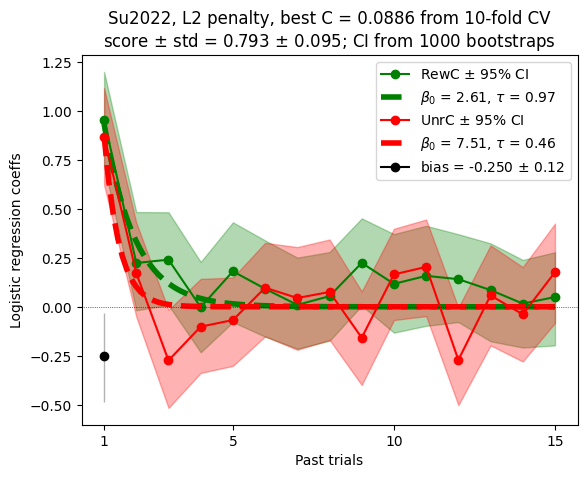

In [28]:
# Show one png
from IPython.display import Image
Image(f"./tmp/{fig_downloaded[0]}")

## 3. Get RL fitting results

In [45]:
from aind_analysis_arch_result_access.han_pipeline import get_mle_model_fitting
df = get_mle_model_fitting(subject_id="730945", session_date="2024-10-24")

print(df.columns)
print(df[["agent_alias", "AIC", "prediction_accuracy_10-CV_test"]])

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'session_date': '2024-10-24'}
Found 5 MLE fitting records!
Found 5 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 5/5 [00:00<00:00, 25.54it/s]


Index(['_id', 'nwb_name', 'session_date', 'status', 'subject_id',
       'agent_alias', 'log_likelihood', 'AIC', 'BIC', 'LPT', 'LPT_AIC',
       'LPT_BIC', 'k_model', 'n_trials', 'prediction_accuracy',
       'prediction_accuracy_test', 'prediction_accuracy_fit',
       'prediction_accuracy_test_bias_only', 'params',
       'prediction_accuracy_10-CV_test', 'prediction_accuracy_10-CV_test_std',
       'prediction_accuracy_10-CV_fit', 'prediction_accuracy_10-CV_fit_std',
       'prediction_accuracy_10-CV_test_bias_only',
       'prediction_accuracy_10-CV_test_bias_only_std', 'latent_variables'],
      dtype='object')
                  agent_alias          AIC  prediction_accuracy_10-CV_test
0  QLearning_L1F1_CK1_softmax   239.519051                        0.898151
1         QLearning_L1F0_epsi   403.621460                        0.762075
2  QLearning_L2F1_CK1_softmax   236.265381                        0.903280
3                        WSLS  4051.958064                        0.636196
4

Also download figures

In [47]:
df = get_mle_model_fitting(
    subject_id="730945",
    session_date="2024-10-24",
    if_download_figures=True,
    download_path="./mle_figures",
)
!ls ./mle_figures

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'session_date': '2024-10-24'}
Found 5 MLE fitting records!
Found 5 successful MLE fitting!


Download figures from s3: 100%|██████████| 5/5 [00:00<00:00, 40.74it/s]

730945_2024-10-24_17-38-06_QLearning_L1F0_epsi_58cc5b6f6e.png
730945_2024-10-24_17-38-06_QLearning_L1F1_CK1_softmax_3ffdf98012.png
730945_2024-10-24_17-38-06_QLearning_L2F1_CK1_softmax_5ce7f1f816.png
730945_2024-10-24_17-38-06_QLearning_L2F1_softmax_ec59be40c0.png
730945_2024-10-24_17-38-06_WSLS_7c61d01e0f.png


Get fittings from all sessions of a mouse for a specific model


In [50]:
df = get_mle_model_fitting(
    subject_id="730945",
    agent_alias="QLearning_L2F1_CK1_softmax",
    if_download_figures=False,
)
print(df.iloc[:10][["nwb_name", "agent_alias"]])

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '730945', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax'}
Found 32 MLE fitting records!
Found 32 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 32/32 [00:00<00:00, 48.98it/s]

                         nwb_name                 agent_alias
0  730945_2024-08-27_16-07-16.nwb  QLearning_L2F1_CK1_softmax
1  730945_2024-09-05_16-47-58.nwb  QLearning_L2F1_CK1_softmax
2  730945_2024-10-23_15-33-07.nwb  QLearning_L2F1_CK1_softmax
3  730945_2024-09-19_17-26-54.nwb  QLearning_L2F1_CK1_softmax
4  730945_2024-09-04_16-04-38.nwb  QLearning_L2F1_CK1_softmax
5  730945_2024-08-30_15-55-05.nwb  QLearning_L2F1_CK1_softmax
6  730945_2024-08-29_15-50-57.nwb  QLearning_L2F1_CK1_softmax
7  730945_2024-10-24_17-38-06.nwb  QLearning_L2F1_CK1_softmax
8  730945_2024-09-12_17-21-58.nwb  QLearning_L2F1_CK1_softmax
9  730945_2024-09-03_15-49-53.nwb  QLearning_L2F1_CK1_softmax


(for advanced users) Use your own docDB query

In [53]:
df = get_mle_model_fitting(
    from_custom_query={
        "analysis_results.fit_settings.agent_alias": "QLearning_L2F1_CK1_softmax",
        "analysis_results.n_trials" : {"$gt": 600},
    },
    if_include_latent_variables=False,
    if_download_figures=False,
)

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CK1_softmax', 'analysis_results.n_trials': {'$gt': 600}}
Found 807 MLE fitting records!
Found 807 successful MLE fitting!


In [54]:
df.shape

(807, 25)

In [14]:
from aind_analysis_arch_result_access.han_pipeline import get_mle_model_fitting
df = get_mle_model_fitting(
    session_date="2025-03-21",
    if_include_metrics=False,
    if_include_latent_variables=True,
    if_download_figures=False,
    download_path="./model_fitting"
)
df.query("status == 'success'")

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'session_date': '2025-03-21'}
Found 128 MLE fitting records!
Found 124 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 124/124 [00:01<00:00, 77.61it/s]


,_id,nwb_name,session_date,status,subject_id,agent_alias,latent_variables
0,1de8d3ec02d549858851fdf00b4313fe232c1c2c3667a3...,786847_2025-03-21_08-56-06.nwb,2025-03-21,success,786847,WSLS,"{'loss_count': [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
1,ffe2731a519000bd0bd19ceba28a061dc12928883be309...,752014_2025-03-21_09-02-38.nwb,2025-03-21,success,752014,WSLS,"{'loss_count': [0.0, 1.0, 2.0, 3.0, 0.0, 0.0, ..."
2,9dcf851497f8d4e2baa54a53e36ca12b9ed3e07aa62f36...,766557_2025-03-21_09-41-38.nwb,2025-03-21,success,766557,WSLS,"{'loss_count': [0.0, 1.0, 2.0, 3.0, 0.0, 0.0, ..."
3,aa2bf87c62161184847930926cd5785995d1333986f505...,781895_2025-03-21_09-38-01.nwb,2025-03-21,success,781895,WSLS,"{'loss_count': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, ..."
4,e272b098277ded1875825d3868e247b1259f171d4b0478...,763359_2025-03-21_11-03-03.nwb,2025-03-21,success,763359,QLearning_L2F1_softmax,"{'q_value': [[0.0, 0.7980392020209945, 0.0, 0...."
...,...,...,...,...,...,...,...
123,6bba9c04030fa2e2f3e9cb975da37969f75517b0cdd60d...,780280_2025-03-21_09-05-14.nwb,2025-03-21,success,780280,QLearning_L1F1_CK1_softmax,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
124,9423026af580071f54f0a96a4156247e33b6c4466972c5...,786866_2025-03-21_11-07-11.nwb,2025-03-21,success,786866,QLearning_L1F1_CK1_softmax,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
125,8bd4bf5560a511ab87145c72096df77a03575eafb0f4c0...,778149_2025-03-21_13-14-43.nwb,2025-03-21,success,778149,QLearning_L2F1_softmax,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
126,1c351c97cf1b4870bc112f06662363f235aafbab08b1e9...,786866_2025-03-21_11-07-11.nwb,2025-03-21,success,786866,QLearning_L2F1_softmax,"{'q_value': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
